In [2]:
import time
import sys
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
import multiprocessing
import os
from scipy import sparse
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn import ensemble
import datetime as dt
from datetime import date
import calendar
from calendar import weekday, day_name
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from sklearn.datasets import make_regression

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('another_all_train_matrix.csv', sep=',')
df

,date,store_nbr,item_nbr,units,date2,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,1,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
1,2012-01-01,1,2,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
2,2012-01-01,1,3,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
3,2012-01-01,1,4,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
4,2012-01-01,1,5,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
5,2012-01-01,1,6,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
6,2012-01-01,1,7,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
7,2012-01-01,1,8,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
8,2012-01-01,1,9,29,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
9,2012-01-01,1,10,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6


In [ ]:
# OLS
model = sm.OLS.from_formula("units ~ date + store_nbr + item_nbr + day + year + "
                                 "C(month) + weekday + C(is_weekend) + C(is_holiday) + C(is_holiday_weekday) + "
                                 "C(is_holiday_weekend) + station_nbr + "
                                 "tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + "
                                 "snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir"
                                 "+ avgspeed", data=df)
result = model.fit()

In [ ]:
# 레버리지의 합(K) 구하기
influence = result.get_influence()
hat = influence.hat_matrix_diag
K = hat.sum()
N = len(df.units)
print("모수 갯수(K):", K)
print("데이터 갯수(N):", N)

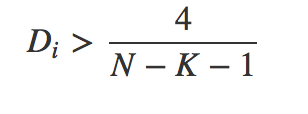

In [ ]:
# Cook's Distance 기준값보다 큰 아웃라이어 제거 (작은 값 남기기)
cooks_d, pvals = influence.cooks_distance
fox_cr = 4 / (N - K - 1)
#plt.stem(np.arange(len(cooks_d)), cooks_d, marketfmt=",")
idx = np.where(cooks_d > fox_cr)[0]

In [ ]:
idx

In [33]:
df2 = df.iloc[idx, :]
df2.head(3550)

,date,store_nbr,item_nbr,units,date2,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
8,2012-01-01,1,9,29,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
119,2012-01-02,1,9,60,2012-01-02,Mon,0,1,1,0,...,0.0,723.0,1628.0,0.0,0.01,29.44,29.62,9.8,24.0,10.3
230,2012-01-03,1,9,15,2012-01-03,Tue,0,0,0,0,...,0.0,723.0,1629.0,0.0,0.00,29.67,29.87,10.8,31.0,11.6
341,2012-01-04,1,9,20,2012-01-04,Wed,0,0,0,0,...,0.0,723.0,1630.0,0.0,0.00,29.86,30.03,6.3,27.0,8.3
452,2012-01-05,1,9,16,2012-01-05,Thu,0,0,0,0,...,0.0,723.0,1631.0,0.0,0.00,29.67,29.84,6.9,25.0,7.8
563,2012-01-06,1,9,12,2012-01-06,Fri,0,0,0,0,...,0.0,723.0,1631.0,0.0,0.00,29.68,29.84,0.3,1.0,2.4
674,2012-01-07,1,9,2,2012-01-07,Sat,1,0,0,0,...,0.0,723.0,1632.0,0.0,0.00,29.57,29.76,3.0,26.0,3.6
785,2012-01-08,1,9,22,2012-01-08,Sun,1,0,0,0,...,0.0,722.0,1633.0,0.0,0.00,29.90,30.11,5.1,30.0,6.6
1007,2012-01-10,1,9,25,2012-01-10,Tue,0,0,0,0,...,0.0,722.0,1636.0,0.0,1.58,29.69,29.86,5.4,25.0,6.5
1118,2012-01-11,1,9,26,2012-01-11,Wed,0,0,0,0,...,0.0,722.0,1637.0,0.0,0.00,29.91,30.10,3.4,7.0,4.2


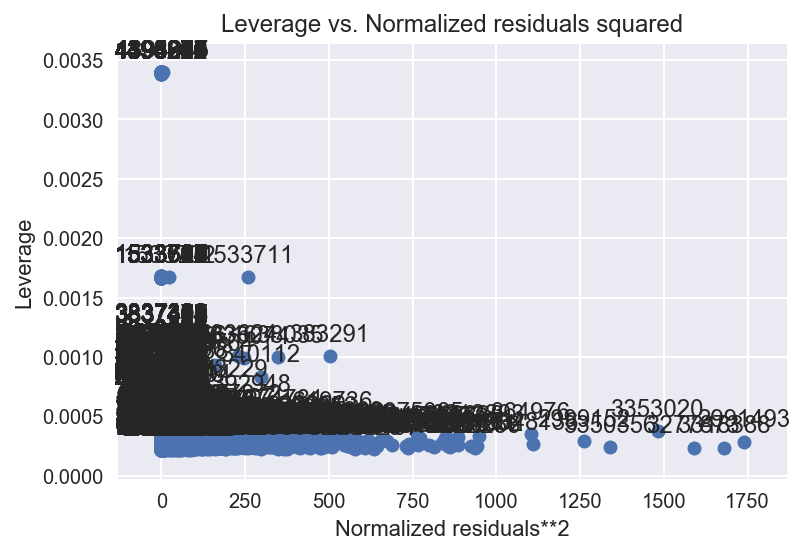

In [9]:
sm.graphics.plot_leverage_resid2(result)
plt.show()